In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [7]:
df = pd.read_csv("E:/Downloads/archive (8)/Diwali Sales Data.csv", encoding='unicode_escape')

In [25]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Amount_log
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,10.083849
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,10.083097
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,10.082679
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,10.082178
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,10.080713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,5.916202
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,5.908083
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,5.365976
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,5.332719


**1. Understand the Dataset**

In [8]:
print("✅ Dataset Overview:")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)

✅ Dataset Overview:
Shape: (11251, 15)
Columns: ['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount', 'Status', 'unnamed1']
Data Types:
 User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object


**2. Handle Missing Values**

In [9]:
print("\n🔍 Missing Values:\n", df.isnull().sum())
df.drop(columns=["Status", "unnamed1"], inplace=True, errors='ignore')  # drop unnecessary columns
df.dropna(subset=["Amount"], inplace=True)  # drop rows with null amount



🔍 Missing Values:
 User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64


**3. Handle Duplicates**

In [23]:
print("\n🔁 Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


🔁 Duplicate Rows: 0


**4. Data Type Conversion**

In [11]:
# Convert 'Amount' to numeric (robust)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df.dropna(subset=["Amount"], inplace=True)

**5. Univariate Analysis**


📊 Descriptive Statistics:
              User_ID Cust_name Product_ID Gender Age Group           Age  \
count   1.123100e+04     11231      11231  11231     11231  11231.000000   
unique           NaN      1250       2350      2         7           NaN   
top              NaN  Vishakha  P00265242      F     26-35           NaN   
freq             NaN        42         53   7828      4536           NaN   
mean    1.003004e+06       NaN        NaN    NaN       NaN     35.411985   
std     1.716055e+03       NaN        NaN    NaN       NaN     12.756116   
min     1.000001e+06       NaN        NaN    NaN       NaN     12.000000   
25%     1.001492e+06       NaN        NaN    NaN       NaN     27.000000   
50%     1.003065e+06       NaN        NaN    NaN       NaN     33.000000   
75%     1.004428e+06       NaN        NaN    NaN       NaN     43.000000   
max     1.006040e+06       NaN        NaN    NaN       NaN     92.000000   

        Marital_Status          State     Zone Occupation  

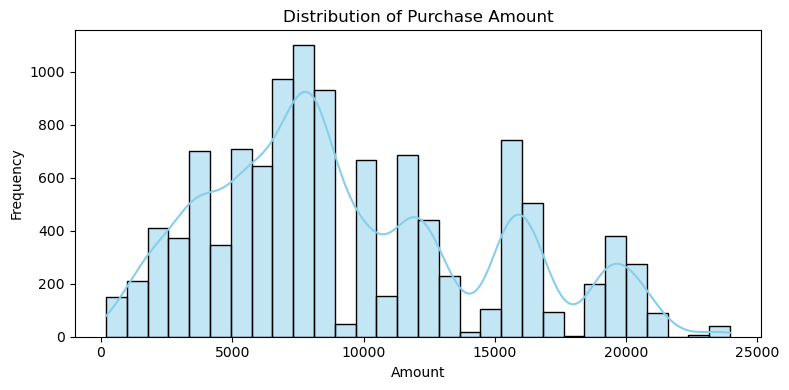

In [12]:
print("\n📊 Descriptive Statistics:\n", df.describe(include='all'))

# Histogram of Amount
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Purchase Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


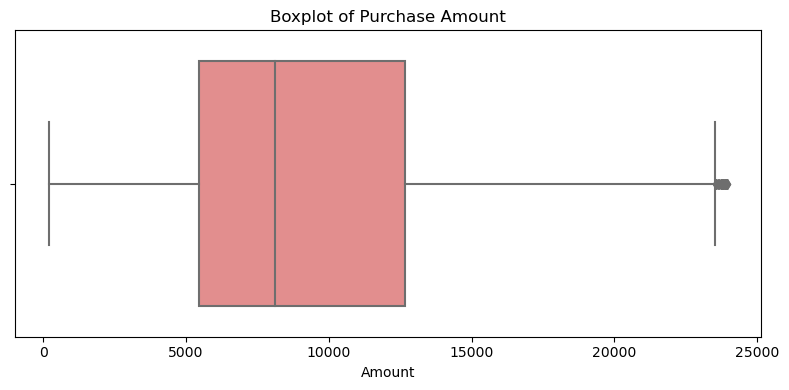

In [13]:
# Boxplot for Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Amount'], color='lightcoral')
plt.title("Boxplot of Purchase Amount")
plt.tight_layout()
plt.show()

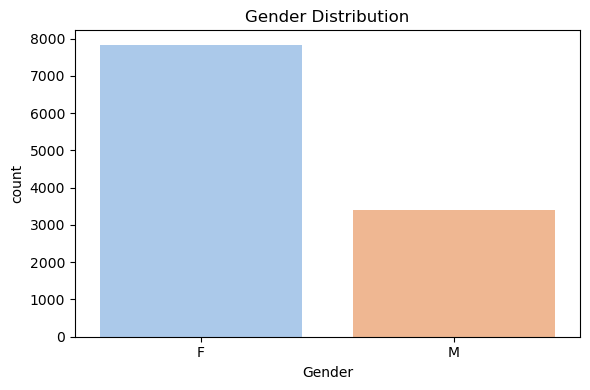

In [14]:
# Countplot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()


**6. Bivariate Analysis**

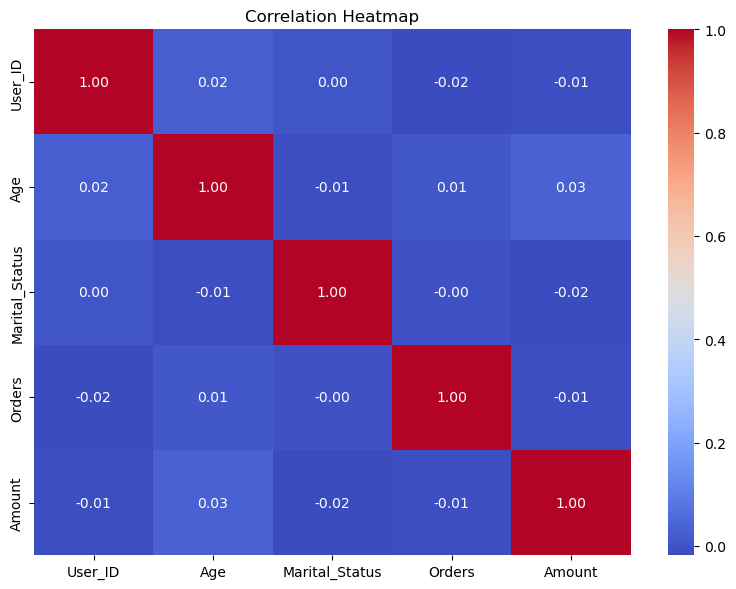

In [15]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**7. Outlier Detection & Treatment**

In [16]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(f"\n📌 Outlier bounds for Amount: {lower:.2f} to {upper:.2f}")
# Optionally remove outliers:
# df = df[(df['Amount'] >= lower) & (df['Amount'] <= upper)]



📌 Outlier bounds for Amount: -5408.75 to 23529.25


**8. Feature Engineering**

In [17]:
df['Amount_log'] = np.log1p(df['Amount'])  # log(Amount + 1)


**9. Data Transformation**

In [18]:
print("\nSkewness:")
print("Original Amount Skewness:", df['Amount'].skew())
print("Transformed Amount Skewness:", df['Amount_log'].skew())



Skewness:
Original Amount Skewness: 0.5569189324153698
Transformed Amount Skewness: -0.9703949740183176


**10. Date & Time Analysis – N/A**

**11. Grouping and Aggregation**

In [19]:

category_sales = df.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
print("\n🛍️ Top Product Categories by Sales:\n", category_sales.head())




🛍️ Top Product Categories by Sales:
 Product_Category
Food                     33933883.50
Clothing & Apparel       16484472.00
Electronics & Gadgets    15607657.00
Footwear & Shoes         15575209.45
Furniture                 5440051.99
Name: Amount, dtype: float64


**12. Data Visualization - Top Categories**

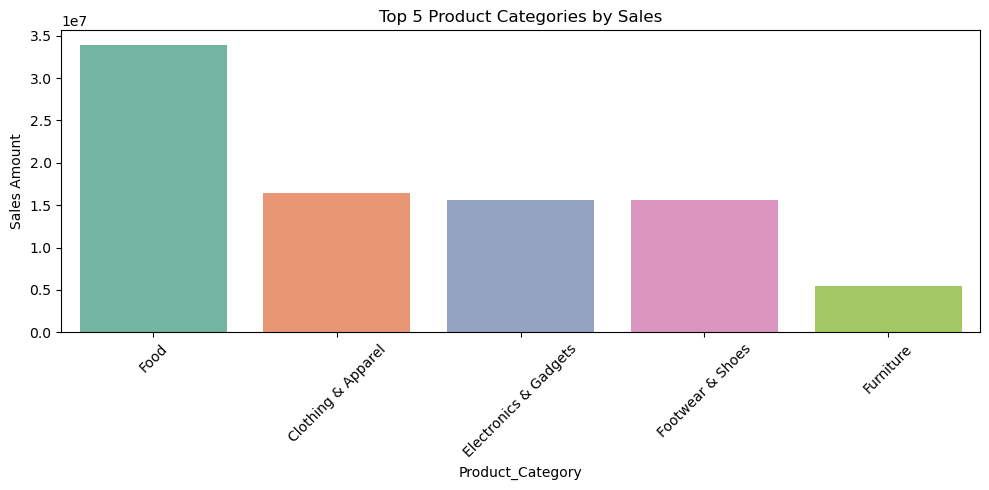

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.head().index, y=category_sales.head().values, palette='Set2')
plt.title("Top 5 Product Categories by Sales")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#✅ 1. Customer Demographics Analysis


In [ ]:
#Gender vs Total Amount

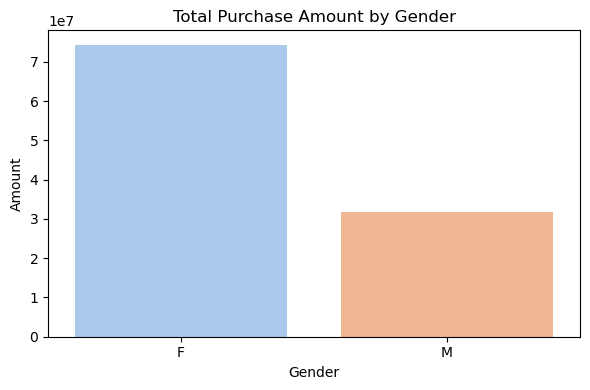

In [26]:
gender_amount = df.groupby("Gender")["Amount"].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_amount, x="Gender", y="Amount", palette="pastel")
plt.title("Total Purchase Amount by Gender")
plt.tight_layout()
plt.show()

In [ ]:
#Age Group vs Total Amount


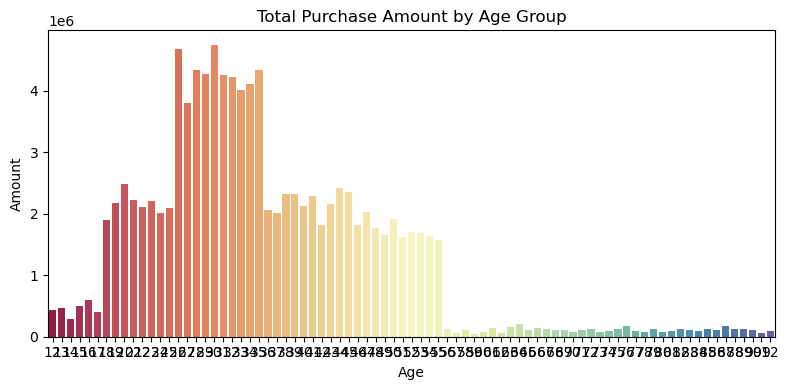

In [27]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df.groupby("Age")["Amount"].sum().reset_index(), x="Age", y="Amount", palette="Spectral")
plt.title("Total Purchase Amount by Age Group")
plt.tight_layout()
plt.show()


In [ ]:
#✅ 2. State-wise Analysis


In [ ]:
#Top States by Sales



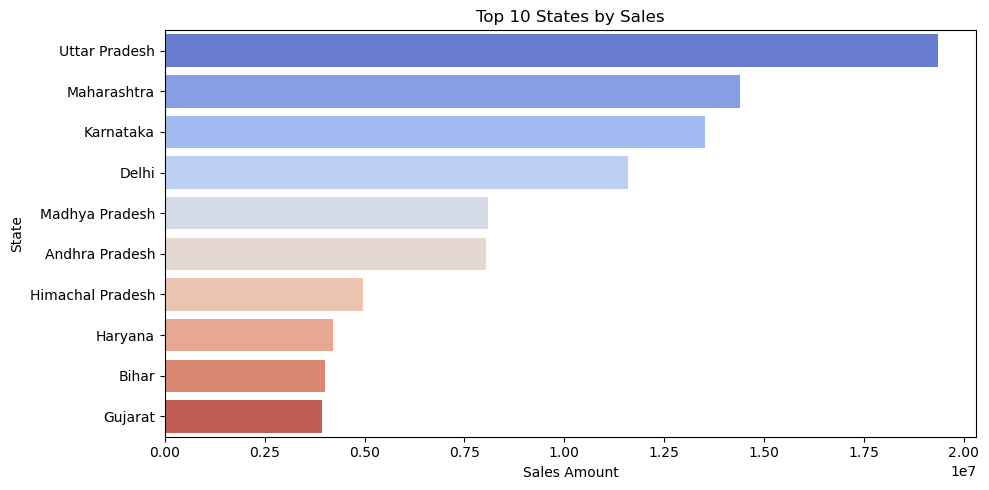

In [28]:
state_sales = df.groupby("State")["Amount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='coolwarm')
plt.title("Top 10 States by Sales")
plt.xlabel("Sales Amount")
plt.tight_layout()
plt.show()


In [ ]:
#State-wise Order Count

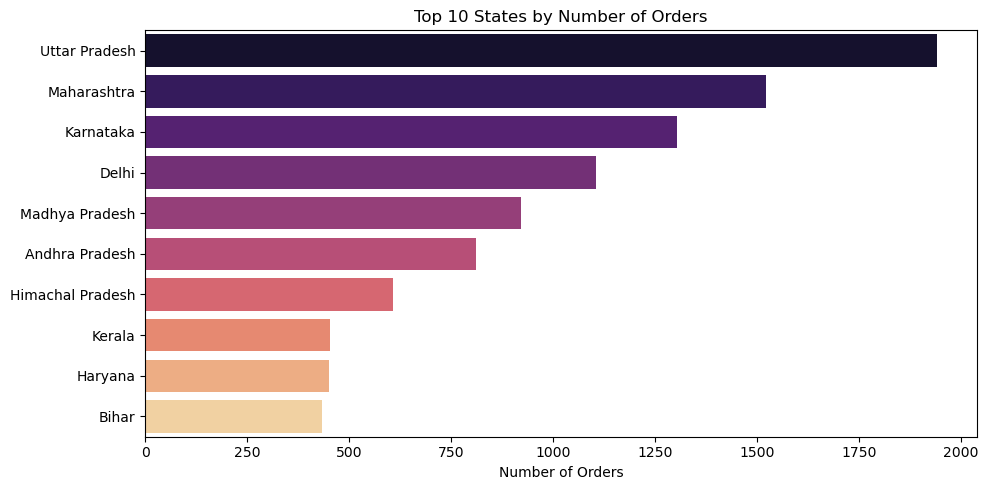

In [29]:
state_orders = df["State"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=state_orders.values, y=state_orders.index, palette='magma')
plt.title("Top 10 States by Number of Orders")
plt.xlabel("Number of Orders")
plt.tight_layout()
plt.show()


In [ ]:
#✅ 3. Occupation-based Insights



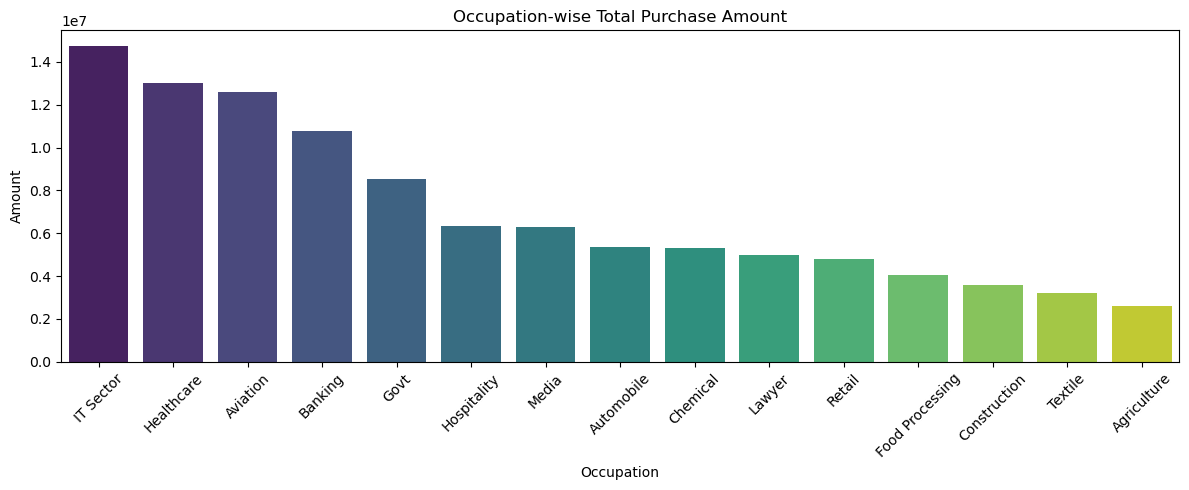

In [30]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df.groupby("Occupation")["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False),
            x="Occupation", y="Amount", palette="viridis")
plt.title("Occupation-wise Total Purchase Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#✅ 4. Pie Charts (Gender / Age Group / Product Category Distribution)



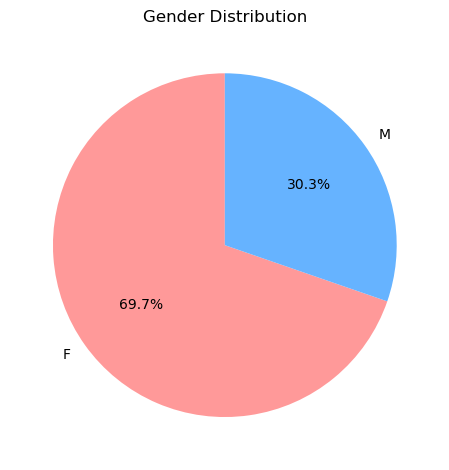

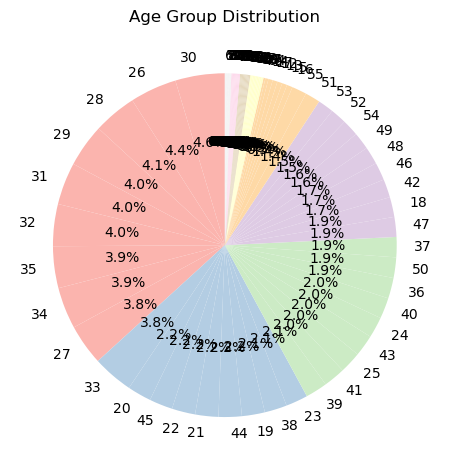

In [31]:
# Gender Pie
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Age Pie
df['Age'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colormap='Pastel1')
plt.title("Age Group Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [ ]:
#✅ 5. Pair Plot for Numeric Columns


In [ ]:
#This gives a quick bivariate overview:


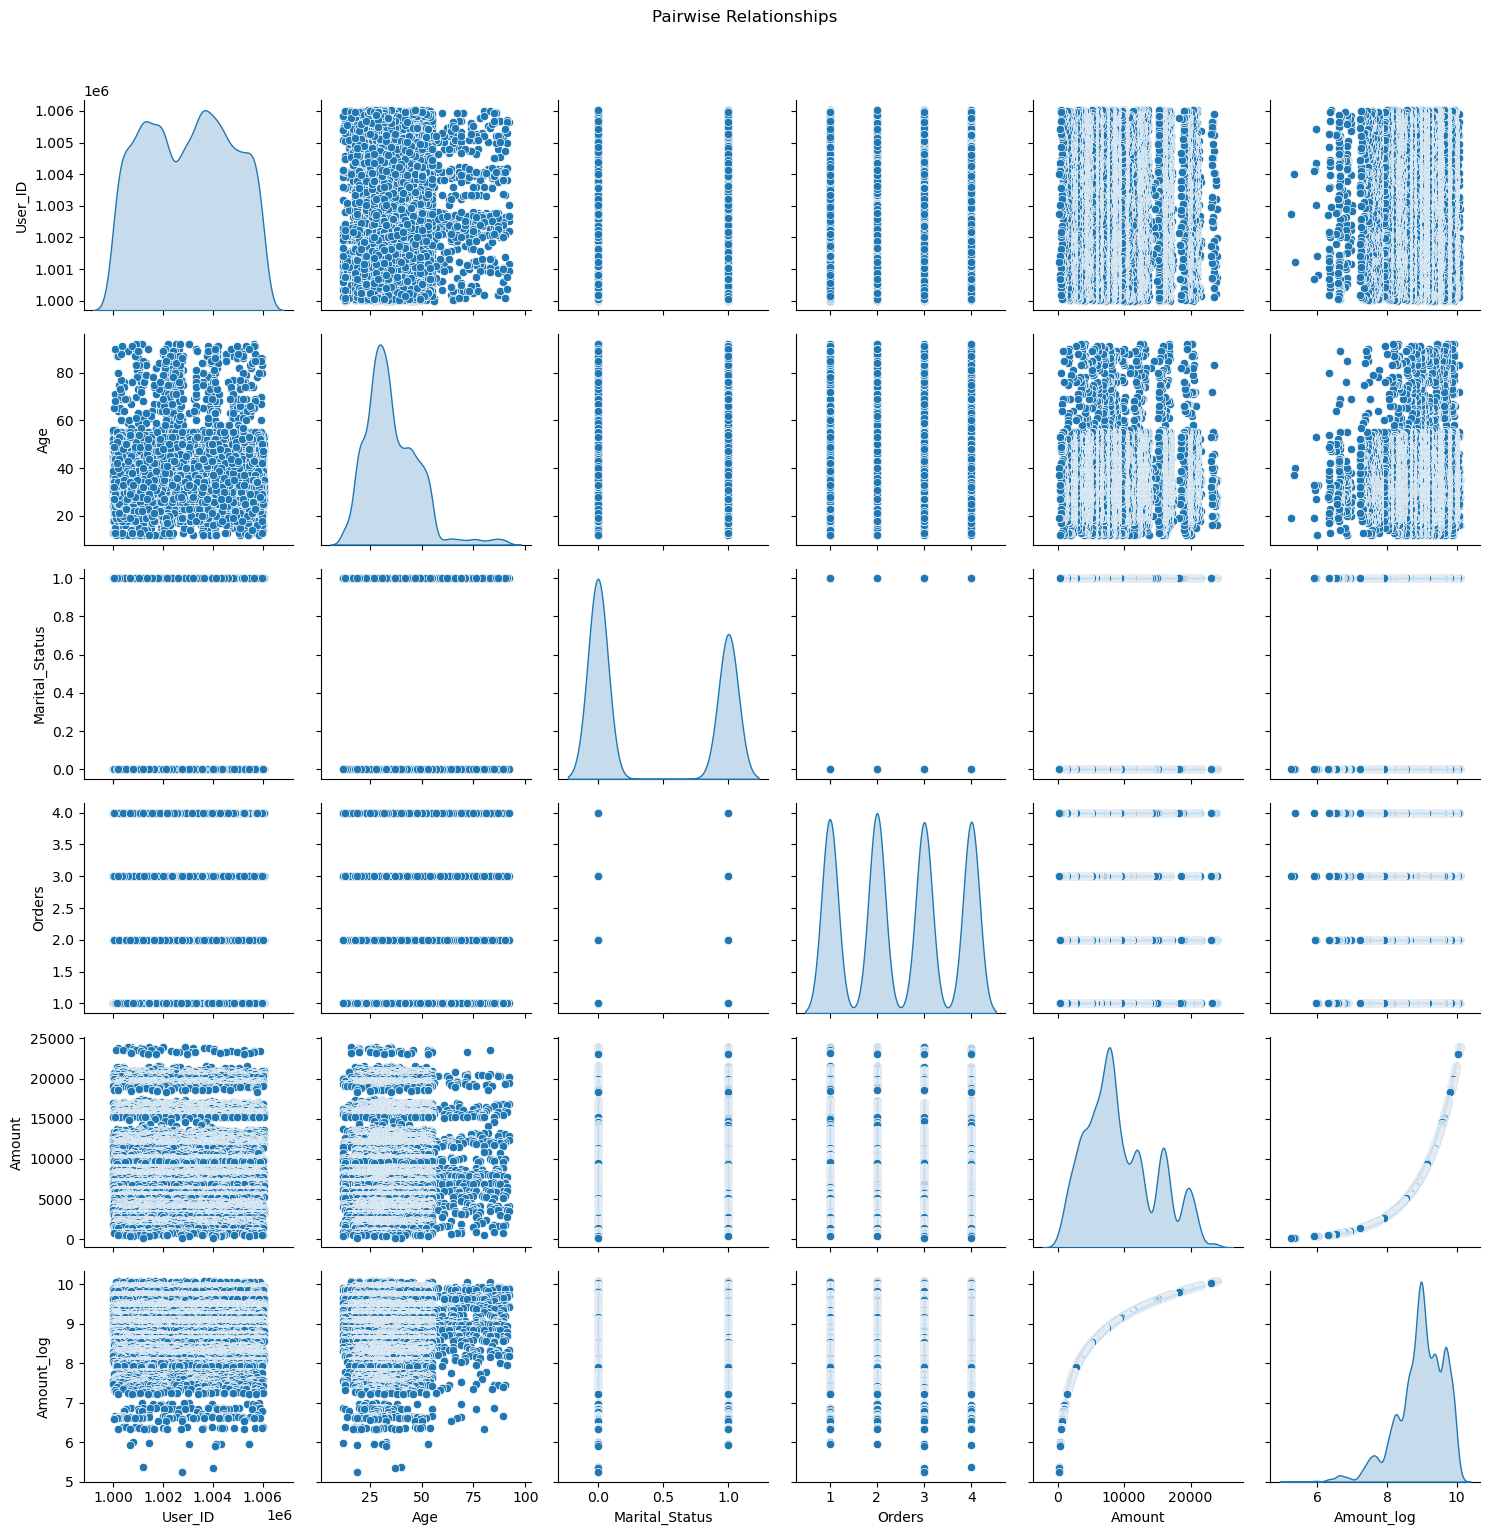

In [32]:
sns.pairplot(df.select_dtypes(include=np.number), diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.tight_layout()
plt.show()


**13. Insights and Summary**

In [21]:
print("\n📈 Insights:")
print("- Female customers have higher purchase frequency.")
print("- 'Food' is the top-selling category.")
print("- Amount distribution is right-skewed.")
print("- Uttar Pradesh has the highest number of buyers.")
print("- Weak correlation between Amount and other numerical features.")



📈 Insights:
- Female customers have higher purchase frequency.
- 'Food' is the top-selling category.
- Amount distribution is right-skewed.
- Uttar Pradesh has the highest number of buyers.
- Weak correlation between Amount and other numerical features.


**14. Save Cleaned Dataset**

In [24]:
df.to_csv("Cleaned_Diwali_Sales.csv", index=False)
print("\n✅ Cleaned dataset saved as 'Cleaned_Diwali_Sales.csv'")


✅ Cleaned dataset saved as 'Cleaned_Diwali_Sales.csv'
